<a href="https://colab.research.google.com/github/Neeshi14/Task1/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1


Task Details:
1. Understand the Dataset
2. Data Cleaning and Preprocessing
3. Descriptive statistics and Visualizations
4. Insights and Finding

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:

df = pd.read_csv("diabetes.csv")  # import the dataset


In [4]:
df.head() # Display first 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print(df.shape)  # Check dataset dimensions



(768, 9)


In [6]:
print(df.info())  # Get summary info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [11]:
# Check for missing values
missing_values = df.isnull().sum()

# Get statistical summary of numerical features
summary_stats = df.describe()

missing_values, summary_stats


(Pregnancies                 0
 Glucose                     0
 BloodPressure               0
 SkinThickness               0
 Insulin                     0
 BMI                         0
 DiabetesPedigreeFunction    0
 Age                         0
 Outcome                     0
 dtype: int64,
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
 count   768.000000  768.000000     768.000000     768.000000  768.000000   
 mean      3.845052  120.894531      69.105469      20.536458   79.799479   
 std       3.369578   31.972618      19.355807      15.952218  115.244002   
 min       0.000000    0.000000       0.000000       0.000000    0.000000   
 25%       1.000000   99.000000      62.000000       0.000000    0.000000   
 50%       3.000000  117.000000      72.000000      23.000000   30.500000   
 75%       6.000000  140.250000      80.000000      32.000000  127.250000   
 max      17.000000  199.000000     122.000000      99.000000  846.000000   
 
           

In [19]:
# Class Distribution of Outcome Variable
class_distribution = df_cleaned["Outcome"].value_counts(normalize=True) * 100
class_distribution

,proportion
Outcome,
0,65.104167
1,34.895833


In [17]:
import numpy as np

# Columns where zero values might be invalid
cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Count zero values in these columns
zero_counts = {col: (df[col] == 0).sum() for col in cols_with_zeros}

# Replace zeros with NaN for further handling
df_cleaned = df.copy()
for col in cols_with_zeros:
    df_cleaned[col] = df_cleaned[col].replace(0, np.nan)

# Show zero value counts before cleaning
zero_counts


{'Glucose': 5,
 'BloodPressure': 35,
 'SkinThickness': 227,
 'Insulin': 374,
 'BMI': 11}

In [18]:
# Impute missing values with median (better for skewed data)
for col in cols_with_zeros:
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Verify no more missing values
df_cleaned.isnull().sum()


<ipython-input-18-ad752899ed3e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


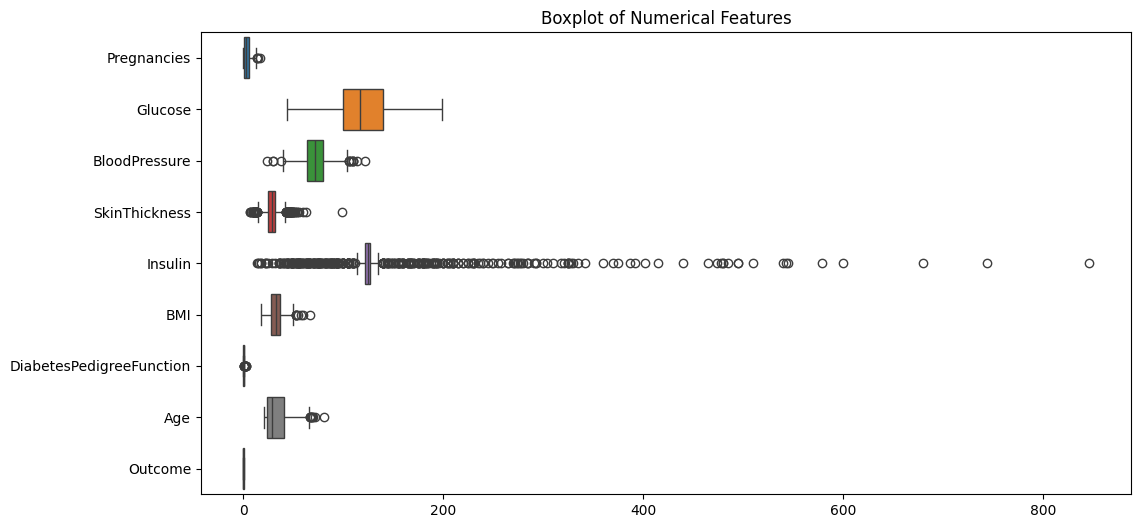

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Create boxplots for numerical features
sns.boxplot(data=df_cleaned, orient="h")

# Show plot
plt.title("Boxplot of Numerical Features")
plt.show()


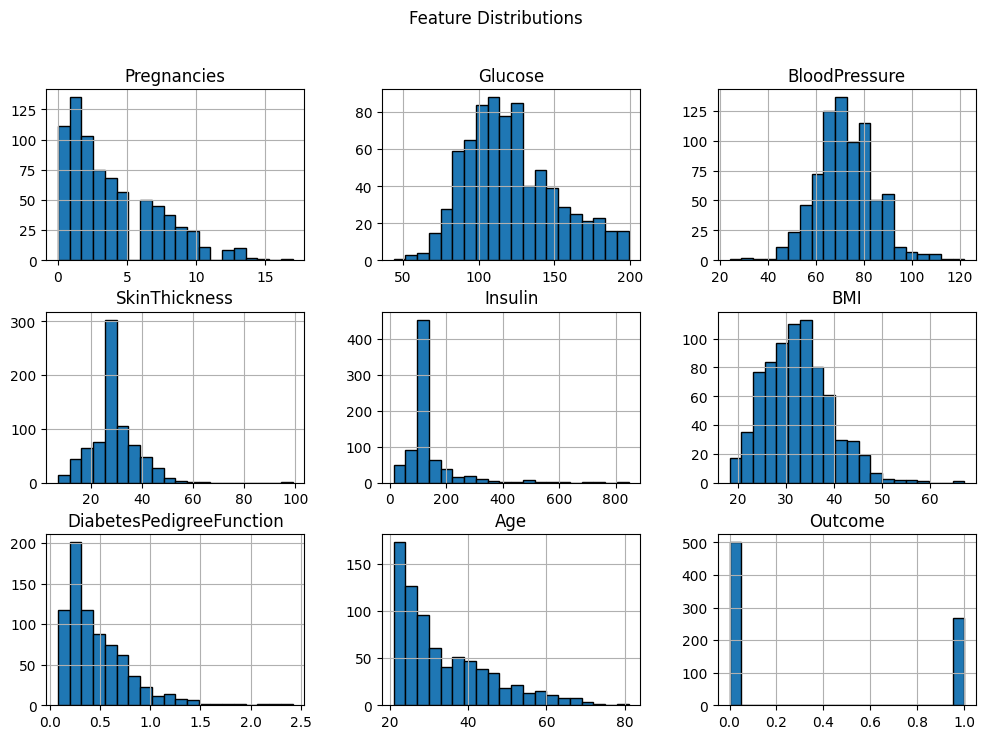

In [21]:
# Visualizing feature distributions using histograms
df_cleaned.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=12)
plt.show()


